In [7]:
import os
os.chdir('D://scratch_backup//perl//jdftx_mod_test//ethylene//morebands//')
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import numpy as np
import jdftxfuncs as jfunc
import cohpfuncs as cfunc
import plotfuncs as pfunc
import matplotlib.pyplot as plt

In [20]:
#savename='CC_bond_trength.png'
bandfile='ethylene.bandProjections'
gvecfile='ethylene.Gvectors'
eigfile='ethylene.eigenvals'
outfile='ethylene.out'
#S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)
Emin = np.min(E)
Emax = np.max(E)
dE = 0.0001
Emax, Emin = cfunc.adjust_Ebounds(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


In [27]:
def quick_int_data(orbs_pairs, Egrid, Emin, Emax, dE, pCOHP_uv):
    for p in orbs_pairs:
        assert len(p) > 1
    pcohp_data = []
    int_pcohp_data =[]
    for p in orbs_pairs:
        pcohp_data.append(pfunc.ez_pCOHP_sum(p[0], p[1], Egrid, Emin, Emax, dE, pCOHP_uv))
        int_pcohp_data.append(pfunc.get_integrated_array(pcohp_data[-1], dE))
    return pcohp_data, int_pcohp_data


def quick_int_plot(orbs_pairs, Egrid, Emin, Emax, dE, pCOHP_uv, mu=None, save=True, title=None):
    """
    :param orbs_pairs: list(tuple)
            tuple: orbs_u, orbs_v, intrx_label(optional)
    :param Egrid:
    :param Emin:
    :param Emax:
    :param dE:
    :param pCOHP_uv: lambda
            function for getting pCOHP
    :return:
    """
    pcohp_data, int_pcohp_data = quick_int_data(orbs_pairs, Egrid, Emin, Emax, dE, pCOHP_uv)
    fig, ax = plt.subplots()
    ax.set_xlabel('E (Hartree)')
    for i, p in enumerate(orbs_pairs):
        if (len(p) > 2):
            if type(p[2]) is str:
                ax.plot(Egrid, pcohp_data[i], color='C'+str(i), label=p[2])
            else:
                ax.plot(Egrid, pcohp_data[i], color='C'+str(i), label='Pair #' + str(i))
        else:
            ax.plot(Egrid, pcohp_data[i], color='C'+str(i), label='Pair #' + str(i))
    ax.set_ylabel(r'$ppCOHP(E)$')
    axint = ax.twinx()
    for i, p in enumerate(orbs_pairs):
        axint.plot(Egrid, int_pcohp_data[i], color='C'+str(i), linestyle='--')
    axint.set_ylabel(r'$\int ppCOHP(E)$')
    pfunc.align_yaxis(ax, axint)
    line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
    line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')
    if not mu is None:
        plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
    if not title is None:
        plt.title(title)
    else:
        plt.title('ppCOHP and integrated ppCOHP')
    fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    fig.tight_layout()
    if save:
        fig.savefig(title + '.png')

In [32]:
orbs_c1 = orbs_dict['C #1']
orbs_c2 = orbs_dict['C #2']
orbs_hbc1 = orbs_dict['H #1'] + orbs_dict['H #2']

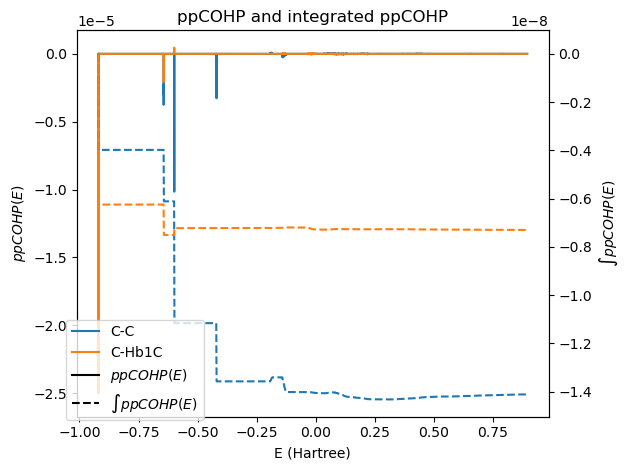

In [34]:
orb_pairs = [
    tuple([orbs_c1, orbs_c2, 'C-C']),
    tuple([orbs_c1, orbs_dict['H #1'], 'C-Hb1C'])
]
quick_int_plot(orb_pairs, Egrid, Emin, Emax, dE, pCOHP_uv, mu=None, save=False, title=None)

In [26]:
type(orb_pairs[0][2])

str

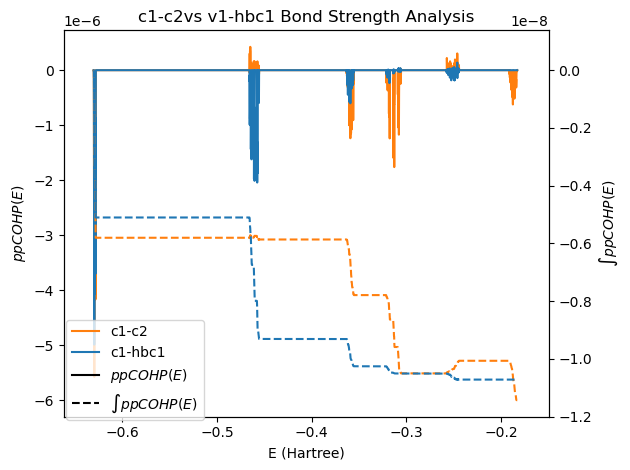

In [16]:
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_c1_c2, color='C1', label='c1-c2')
ax.plot(Egrid, COHP_c1_hbc1, color='C0', label='c1-hbc1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_c1_c2_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_c1_hbc1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
#plt.axvline(x=0.0, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('c1-c2vs v1-hbc1 Bond Strength Analysis')
plt.xlim(xmax = -0.15)


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig(savename)

In [17]:
posns, names, R = jfunc.get_coords_vars('ethylene.out')

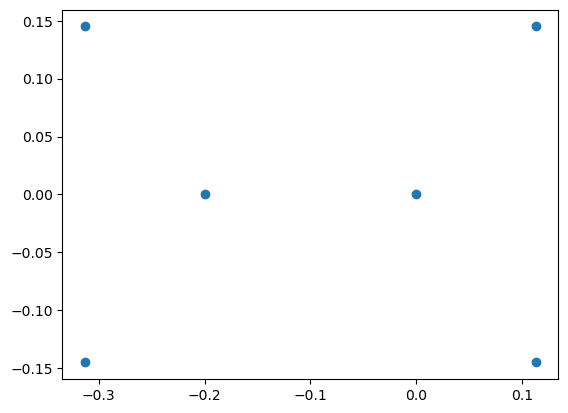

In [21]:
plt.scatter(posns[:,1], posns[:,2])

In [19]:
posns

array([[ 0.   ,  0.113,  0.145],
       [ 0.   ,  0.113, -0.145],
       [ 0.   , -0.313,  0.145],
       [ 0.   , -0.313, -0.145],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   , -0.2  ,  0.   ]])